In [1]:
from clusters_tools import *

import glob
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt

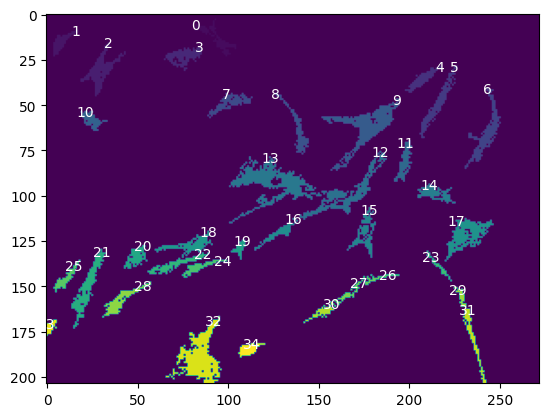

In [19]:
## в папке должны содеражаться только изображения с флуоресцентного микроскопа с динамическим процессом

## загрузка и обработка изображений
im_list = download_images('5-pep-nmda') # вставьте название папки с файлами, или полный путь к папке

# вставьте время добавки (start) и время следующей добавки (end) 
thre = 0.98   # можно поиграться с эти значением, чтобы лучше разграничить клетки
start = 13    # время добавки (кадр)
end = 23      # время следующей добавки (кадр) или + 1.5 минуты для FluO-4
sums = calculate_changes_downsample(start = start, end = end, im_list = im_list, thre = thre) 
complexes = calculate_complexes(sums)

## визуализация изображения
complex_img = complex_to_img(sums, complexes)
c_extended = complexes_extended(complex_img)

plt.imshow(complex_img)

for i, ix in enumerate(complexes):
    label = f'{i}'
    text_x = ix[0][0]
    text_y = ix[0][1]
    plt.text(text_y, text_x, label, color='White', ha='center', va='center')

plt.show()

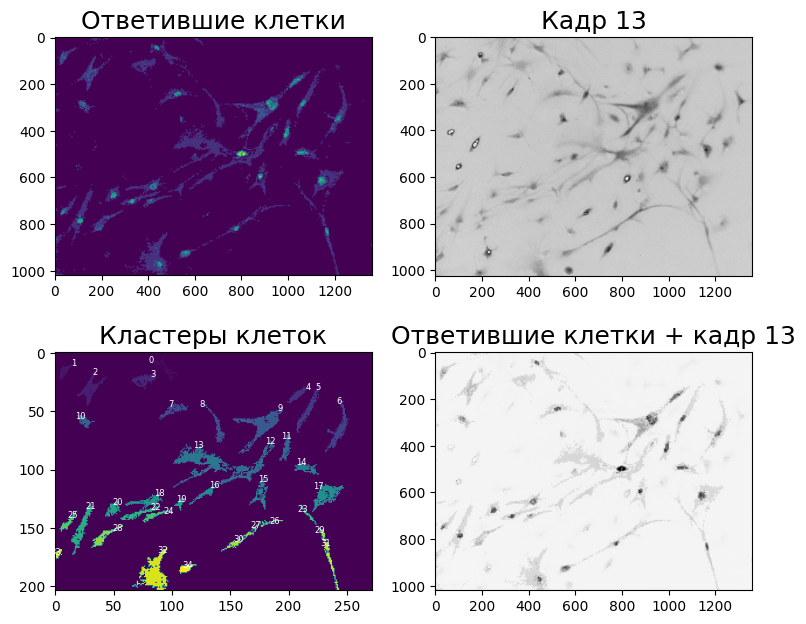

In [20]:
## визуализация клеток
sums_extended = complexes_extended(sums)
x, y = sums_extended.shape
f, axarr = plt.subplots(2,2, figsize=(9, 7.5))
title_fontsize = 18

axarr[0,0].imshow(sums_extended, vmin = 0, vmax = 1)
axarr[0,0].set_title('Ответившие клетки', fontsize=title_fontsize) 

axarr[0,1].imshow(im_list[15-1]/255, vmin = 0, vmax = 1, cmap = 'Greys')
axarr[0,1].set_title(f'Кадр {start}', fontsize=title_fontsize) 

axarr[1,0].imshow(complex_img*2)
axarr[1,0].set_title('Кластеры клеток', fontsize=title_fontsize) 

for i, ix in enumerate(complexes):
    label = f'{i}'
    text_x = ix[0][0]
    text_y = ix[0][1]
    axarr[1,0].text(text_y, text_x, label, color='White', ha='center', va='center', fontsize = 6)
    
axarr[1,1].imshow(sums_extended+(im_list[15-1][:x,:y]/(255*3.5)), vmin = 0, vmax = 1, cmap='Greys')
axarr[1,1].set_title(f'Ответившие клетки + кадр {start}', fontsize=title_fontsize) 

plt.show()

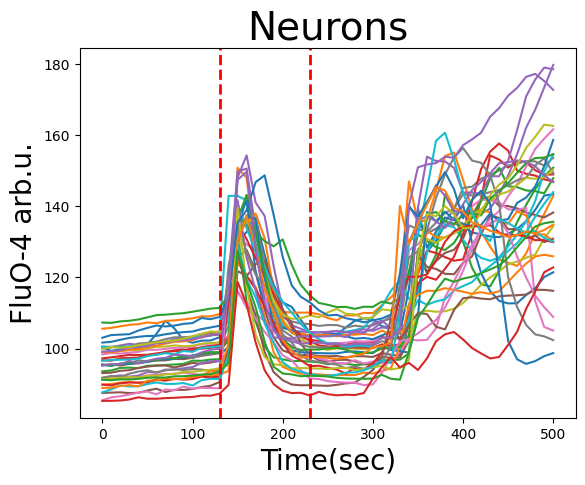

In [24]:
## Подсчет изменения свечения в клетках
lines = calculate_lines(c_extended, im_list)
time_seconds = [i*10 for i in range(len(lines[0]))]
for i in lines:
    plt.plot(time_seconds,i)

plt.title('Neurons', fontsize = 28)
plt.ylabel('FluO-4 arb.u.', fontsize = 20)
plt.xlabel('Time(sec)', fontsize = 20)
plt. axvline(x=start*10, color='r', linestyle='--', linewidth=2)
plt. axvline(x=end*10, color='r', linestyle='--', linewidth=2)
plt.show()

In [80]:
import pandas as pd

## сохранение графиков в формате .csv

dat = {f'{x}':lines[x] for x in range(len(lines))}
dat = pd.DataFrame(dat)
dat.to_csv('neuro.csv') # введите название для нового файла здесь